In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

In [177]:
data_set = pd.read_csv('bike_train.csv')
data_set.info()
data_set.describe()
data_set.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     10450 non-null  object 
 1   season       10450 non-null  int64  
 2   holiday      10450 non-null  int64  
 3   workingday   10450 non-null  int64  
 4   weather      10450 non-null  int64  
 5   temp         10450 non-null  float64
 6   atemp        10450 non-null  float64
 7   humidity     10450 non-null  int64  
 8   windspeed    10450 non-null  float64
 9   casual       10450 non-null  int64  
 10  registered   10450 non-null  int64  
 11  count        10450 non-null  int64  
 12  Unnamed: 12  10450 non-null  int64  
 13  Unnamed: 13  8 non-null      object 
 14  Unnamed: 14  8 non-null      float64
 15  Unnamed: 15  2 non-null      float64
dtypes: float64(5), int64(9), object(2)
memory usage: 1.3+ MB


datetime           0
season             0
holiday            0
workingday         0
weather            0
temp               0
atemp              0
humidity           0
windspeed          0
casual             0
registered         0
count              0
Unnamed: 12        0
Unnamed: 13    10442
Unnamed: 14    10442
Unnamed: 15    10448
dtype: int64

Text(0.5, 1.0, 'Correlation matrix')

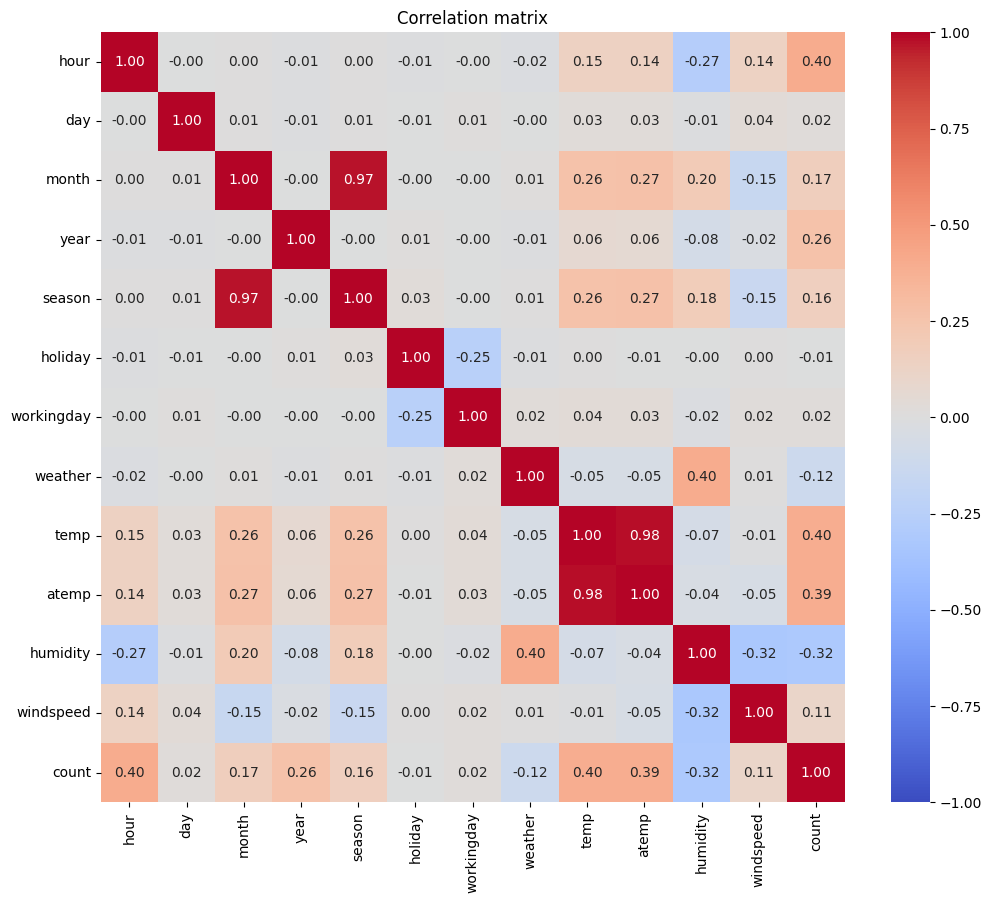

In [178]:
# parse datetime and add numeric time features, then plot correlation of numeric columns only
data_set['datetime'] = pd.to_datetime(data_set['datetime'], dayfirst=True, format='%d-%m-%Y %H:%M')
data_set['hour'] = data_set['datetime'].dt.hour
data_set['day'] = data_set['datetime'].dt.day
data_set['month'] = data_set['datetime'].dt.month
data_set['year'] = data_set['datetime'].dt.year

faetures = ['hour', 'day', 'month', 'year', 'season', 'holiday', 'workingday',
             'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'registered', 'casual']


#faetures = ['hour', 'day', 'month', 'year', 'holiday', 'workingday',
 #            'weather', 'temp', 'humidity', 'windspeed', 'registered', 'casual']
target = 'count'

# compute full correlation matrix (2D) then plot it
#corr_matrix = data_set[features + [target]].select_dtypes(include=[np.number]).corr()
corr_matrix = data_set[features + [target]].drop(['registered','casual'],axis=1).select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation matrix')

# If you only want the correlation of each feature with the target (single column),
# convert the series to a DataFrame before plotting:
# corr_with_target = corr_matrix[[target]].drop(target)
# plt.figure(figsize=(4,10))
# sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
# plt.title('Correlation with count')

In [179]:
#extract the features and target variable
#X = data_set.drop(['count','casual','registered'] ,axis=1)
#y = data_set['count']
X = data_set[features].drop(['registered', 'casual','season','atemp','holiday','workingday','weather'], axis=1)
y = data_set[target]

print(X.head(5))
print(y.head(5))

   hour  day  month  year       temp  humidity  windspeed
0     4    1      1  2011   9.840000        75   0.000000
1     5    1      1  2011   9.840000        75   6.003200
2     7    2      1  2011  16.400000        76  12.998000
3     1    3      1  2011   7.661001        47  27.618461
4     4    3      1  2011   6.560000        47  26.002700
0    1
1    1
2    1
3    1
4    1
Name: count, dtype: int64


In [180]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [181]:
#feed the data to ML models for training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
model = LinearRegression()
model.fit(X_train, y_train_log)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [182]:
#make predictions
y_pred_log = np.maximum(model.predict(X_test),0)
y_pred = np.expm1(y_pred_log)
#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Squared Log Error: {msle}')
""" plt.scatter(y_test, y_pred)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count') 
plt.show()
 """

Mean Squared Error: 25265.92131480258
R^2 Score: 0.2353450323674412
Mean Squared Log Error: 1.08013840064813


" plt.scatter(y_test, y_pred)\nplt.xlabel('Actual Count')\nplt.ylabel('Predicted Count')\nplt.title('Actual vs Predicted Count') \nplt.show()\n "

In [183]:
#using polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
y_train_log = np.log1p(y_train)
model_poly.fit(X_train_poly, y_train_log)
y_pred_poly = np.maximum(model_poly.predict(X_test_poly),0)
y_pred_poly = np.expm1(y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
msle_poly = mean_squared_log_error(y_test, y_pred_poly) 
print(f'Polynomial Features - Mean Squared Error: {mse_poly}')
print(f'Polynomial Features - R^2 Score: {r2_poly}')
print(f'Polynomial Features - Mean Squared Log Error: {msle_poly}')
""" plt.scatter(y_test, y_pred_poly)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count (Polynomial Features)')
plt.show() """


Polynomial Features - Mean Squared Error: 15158.040105829774
Polynomial Features - R^2 Score: 0.5412527996869185
Polynomial Features - Mean Squared Log Error: 0.7309588853026024


" plt.scatter(y_test, y_pred_poly)\nplt.xlabel('Actual Count')\nplt.ylabel('Predicted Count')\nplt.title('Actual vs Predicted Count (Polynomial Features)')\nplt.show() "

In [184]:
#implementing Ridge Regression 
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=3.0)
ridge_model.fit(X_train_poly, y_train_log)
y_pred_ridge = np.maximum(ridge_model.predict(X_test_poly),0)
y_pred_ridge = np.expm1(y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
msle_ridge = mean_squared_log_error(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R^2 Score: {r2_ridge}')
print(f'Ridge Regression - Mean Squared Log Error: {msle_ridge}')
""" plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count (Ridge Regression)')
plt.show()  """

Ridge Regression - Mean Squared Error: 15113.216690532952
Ridge Regression - R^2 Score: 0.5426093481676142
Ridge Regression - Mean Squared Log Error: 0.7302158182339478


C:\Users\sampa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.7507e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


" plt.scatter(y_test, y_pred_ridge)\nplt.xlabel('Actual Count')\nplt.ylabel('Predicted Count')\nplt.title('Actual vs Predicted Count (Ridge Regression)')\nplt.show()  "

In [185]:
#implementing lasso Regression
from sklearn.linear_model import Lasso 
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train_log)
y_pred_lasso = np.maximum(lasso_model.predict(X_test_poly),0)
y_pred_lasso = np.expm1(y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
msle_lasso = mean_squared_log_error(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression - R^2 Score: {r2_lasso}')
print(f'Lasso Regression - Mean Squared Log Error: {msle_lasso}')
""" plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count (Lasso Regression)') """


Lasso Regression - Mean Squared Error: 15003.295907447533
Lasso Regression - R^2 Score: 0.5459360217444484
Lasso Regression - Mean Squared Log Error: 0.7349172369762195


C:\Users\sampa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.968e+03, tolerance: 1.733e+00
  model = cd_fast.enet_coordinate_descent(


" plt.scatter(y_test, y_pred_lasso)\nplt.xlabel('Actual Count')\nplt.ylabel('Predicted Count')\nplt.title('Actual vs Predicted Count (Lasso Regression)') "

In [186]:
#testing model with new data from bike_test.csv
test_data = pd.read_csv('bike_test.csv') 
test_data['datetime'] = pd.to_datetime(test_data['datetime'], dayfirst=True, format='%d-%m-%Y %H:%M')
test_data['hour'] = test_data['datetime'].dt.hour
test_data['day'] = test_data['datetime'].dt.day
test_data['month'] = test_data['datetime'].dt.month
test_data['year'] = test_data['datetime'].dt.year
features_test = ['hour', 'day', 'month', 'year', 'season','holiday', 'workingday',
             'weather', 'temp', 'atemp','humidity', 'windspeed']
X_new = test_data[features_test].drop(['season','atemp','holiday','workingday','weather'], axis=1)



In [ ]:
X_new_poly = poly.transform(X_new)
y_new_pred = np.maximum(ridge_model.predict(X_new_poly),0)
y_pred_ridge = np.expm1(y_new_pred)
#redirecting the predictions to a csv file
output = pd.DataFrame({'datetime': test_data['datetime'], 'count_predicted': y_pred_ridge})
output.to_csv('submission.csv', index=False)